In [3]:
#importing the dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score



In [5]:
# data collection and processing

loan_dataset= pd.read_csv("loan dataset.csv")
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
#number of rows and columns

loan_dataset.shape

(614, 13)

In [9]:
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [11]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan_dataset= loan_dataset.dropna()

In [15]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
loan_dataset.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27168\2075761180.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status": {'N':0, 'Y':1}}, inplace=True)


In [19]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [21]:
# dependent column value

loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [37]:
#replacing the value of 3+ to 4

loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [39]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

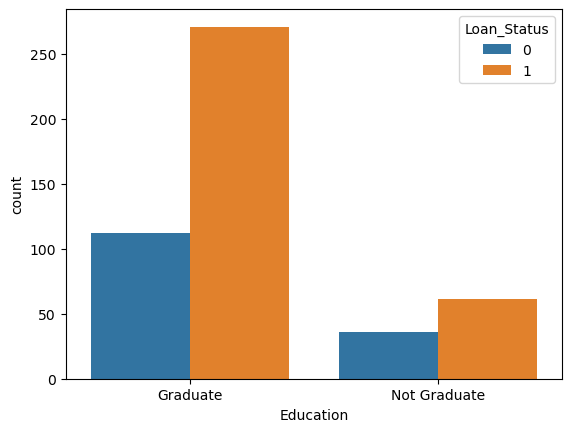

In [41]:
#Data Visualization

#education and loan status 

sns.countplot(x='Education', hue='Loan_Status' , data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

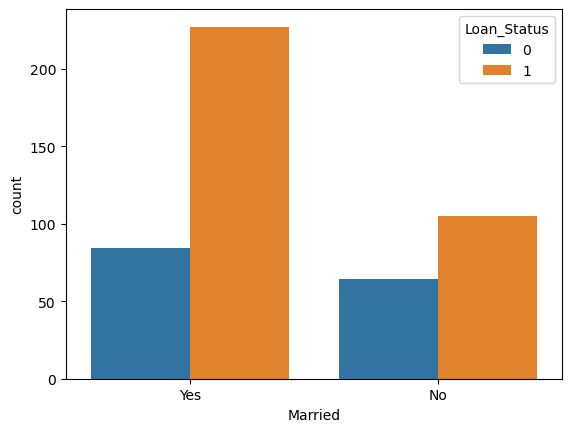

In [43]:
sns.countplot(x='Married', hue='Loan_Status' , data=loan_dataset)

In [54]:
#convert catagorical columns to numerical values

loan_dataset.replace({'Married':{'No':0, 'Yes':1},
                      'Gender':{'Male':1, 'Female':0}, 
                      'Self_Employed':{'No':0, 'Yes':1}, 
                      'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},
                      'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27168\3381517538.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0, 'Yes':1},


In [56]:
loan_dataset.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1

In [64]:
#separating the data and label

X= loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y= loan_dataset['Loan_Status']



In [68]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [72]:
#Train test Split



X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify= Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [78]:
# Training the model

#SVM Model

classifier = svm.SVC(kernel='linear')

#training the support vector machine model

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [82]:
#Model Evaluation 


#accuracy score on training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

print("training data accuracy:", training_data_accuracy)

training data accuracy: 0.7986111111111112


In [84]:
#accuracy score on testing data

X_test_prediction = classifier.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction, Y_test)

print("testing data accuracy:", testing_data_accuracy)

testing data accuracy: 0.8333333333333334


In [92]:
#MAKING A PREDICTIVE SYSTEM

# Sample input data (from Gender to Property_Area)
Input_data = (1, 1, 4, 1, 0, 3036, 2504.0, 158.0, 360.0, 0.0, 1)

# Convert the input data to numpy array
Input_data_as_numpy_array = np.asarray(Input_data)

# Reshaping the data as we are predicting for one instance
input_reshaping = Input_data_as_numpy_array.reshape(1, -1)

# Ensure preprocessing steps (e.g., encoding, scaling) match the training data steps
# Here you might need to apply similar preprocessing as done for training data (if any)

# Predicting using the classifier
prediction = classifier.predict(input_reshaping)


print(prediction)
# Output result in readable format
if prediction == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")



[0]
Loan Not Approved


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
